<a href="https://colab.research.google.com/github/lisyaaprl/lisyaaprl.github.io/blob/main/project/Exploration_Dataset_Marathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Data Exploration** : marathon-data.csv

### **Nama:** Lisya Apriliani

---

### **NIM:** 24060119120016

---

### **Data Besar (A)**

In [ ]:
#install spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
#setting environment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
#inisialisasi spark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
#upload file
from google.colab import files
!rm marathon-data.csv
files.upload()

rm: cannot remove 'marathon-data.csv': No such file or directory


Saving marathon-data.csv to marathon-data.csv


{'marathon-data.csv': b'age,gender,split,final\n33,M,01:05:38,02:08:51\n32,M,01:06:26,02:09:28\n31,M,01:06:49,02:10:42\n38,M,01:06:16,02:13:45\n31,M,01:06:32,02:13:59\n31,M,01:06:13,02:14:11\n27,M,01:06:40,02:14:28\n31,M,01:06:31,02:15:16\n30,M,01:05:39,02:15:57\n30,M,01:05:40,02:16:39\n26,M,01:08:10,02:18:18\n29,M,01:05:54,02:18:52\n28,M,01:08:59,02:19:36\n24,M,01:09:16,02:19:45\n37,M,01:05:21,02:19:47\n25,M,01:09:52,02:20:17\n22,M,01:09:53,02:20:57\n30,M,01:05:40,02:21:17\n26,M,01:10:11,02:21:24\n36,M,01:10:35,02:21:55\n28,M,01:11:59,02:22:14\n31,M,01:05:54,02:22:20\n41,M,01:09:14,02:22:27\n24,M,01:11:18,02:22:55\n26,M,01:10:17,02:22:56\n36,M,01:06:39,02:23:31\n28,M,01:10:32,02:23:39\n29,M,01:12:25,02:23:48\n34,W,01:12:35,02:24:13\n31,M,01:14:07,02:25:19\n39,W,01:13:13,02:25:37\n29,M,01:09:59,02:25:38\n29,W,01:13:09,02:25:50\n31,M,01:13:24,02:25:56\n30,M,01:11:51,02:26:15\n30,M,01:08:34,02:26:36\n34,M,01:06:20,02:27:22\n27,M,01:12:23,02:27:24\n23,M,01:13:42,02:27:32\n37,M,01:12:10,02

In [ ]:
#load file
df = spark.read.csv('marathon-data.csv', inferSchema=True, header=True, sep=",")
df.show(5)

+---+------+--------+--------+
|age|gender|   split|   final|
+---+------+--------+--------+
| 33|     M|01:05:38|02:08:51|
| 32|     M|01:06:26|02:09:28|
| 31|     M|01:06:49|02:10:42|
| 38|     M|01:06:16|02:13:45|
| 31|     M|01:06:32|02:13:59|
+---+------+--------+--------+
only showing top 5 rows



In [ ]:
#ubah ke pandas
data = df.select("*").toPandas()

In [ ]:
#cek tipe data
data.dtypes

age        int32
gender    object
split     object
final     object
dtype: object

In [ ]:
#buat fungsi ubah waktu dalam string menjadi timedelta
import pandas as pd
def ubahwaktu(s):
  h, m, s = map(int, s.split(":"))
  return pd.Timedelta(hours=h, minutes=m, seconds=s)

In [ ]:
#ubah menjadi timedelta
data['split'] = data['split'].apply(ubahwaktu)
data['final'] = data['final'].apply(ubahwaktu)

In [ ]:
#cek tipe data
data.dtypes

age                 int32
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [ ]:
#periksa 5 data awal
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
#buat kolom baru untuk split dan final dalam satuan detik
data['split_detik'] = data['split'].view(int) / 1000000000
data['final_detik'] = data['final'].view(int) / 1000000000
data.head()

,age,gender,split,final,split_detik,final_detik
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


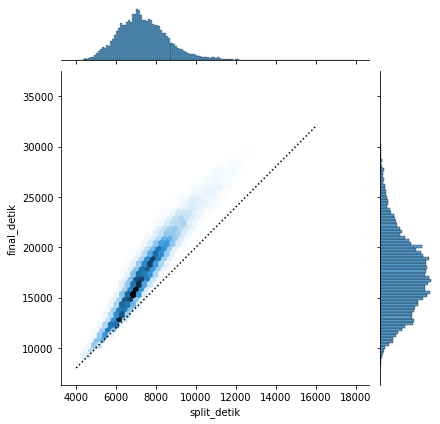

In [ ]:
#gambarkan perbandingan split terhadap final
import seaborn as sns
import numpy as np
g = sns.jointplot("split_detik", "final_detik", data, kind='hex')
g.ax_joint.plot(np.linspace(4000, 16000),np.linspace(8000, 32000), ':k')

In [ ]:
#periksa performa
data['split_val'] = 1 - 2 * data['split_detik'] / data['final_detik']
data.head()

,age,gender,split,final,split_detik,final_detik,split_val
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


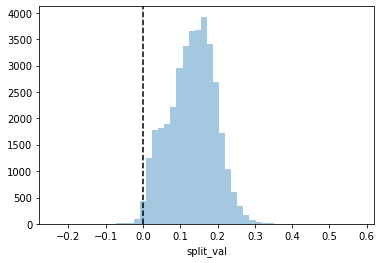

In [ ]:
#visualisasikan berapa banyak yang performanya bagus
import matplotlib.pyplot as plt
sns.distplot(data['split_val'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
#periksa berapa jumlahnya
sum(data.split_val < 0)

251

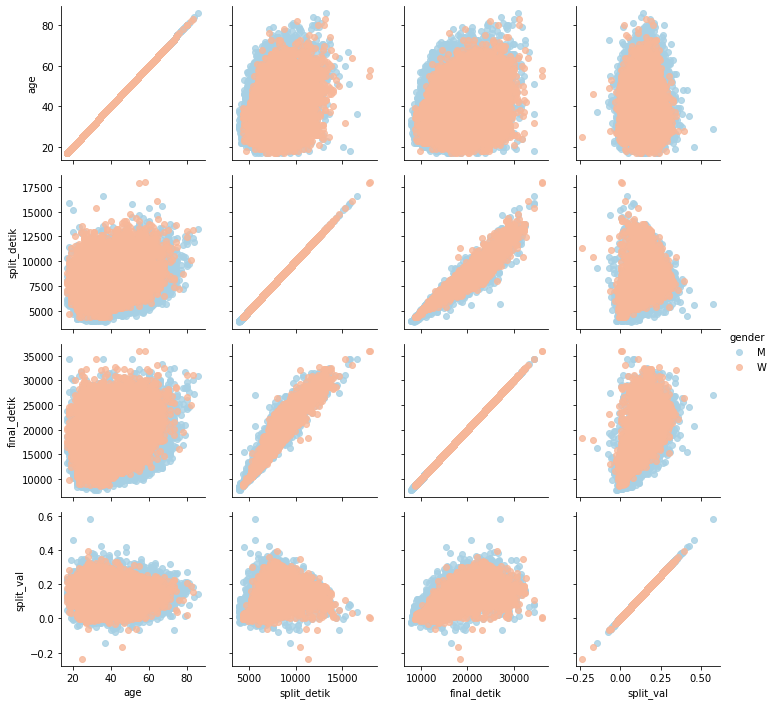

In [ ]:
#periksa perbandingan split, final, dan usia
g = sns.PairGrid(data, vars=['age', 'split_detik', 'final_detik', 'split_val'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

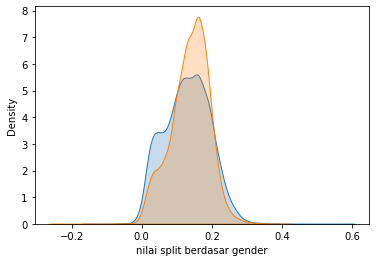

In [ ]:
#adakah perbedaan split berdasarkan gender
sns.kdeplot(data.split_val[data.gender=='M'], label='laki-laki', shade=True)
sns.kdeplot(data.split_val[data.gender=='W'], label='perempuan', shade=True)
plt.xlabel('nilai split berdasar gender');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


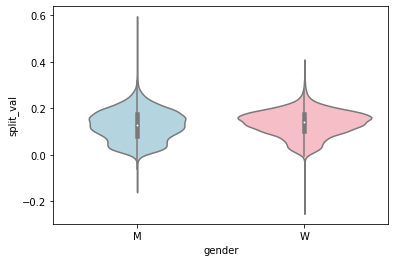

In [ ]:
#visualisasikan dengan violin plot
sns.violinplot("gender", "split_val", data=data, palette=["lightblue", "lightpink"]);

In [ ]:
#coba membuat kelompok usia
data['kelompokusia'] = data.age.map(lambda age: 10 * (age // 10))
data.head(20)

,age,gender,split,final,split_detik,final_detik,split_val,kelompokusia
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30
5,31,M,0 days 01:06:13,0 days 02:14:11,3973.0,8051.0,0.013042,30
6,27,M,0 days 01:06:40,0 days 02:14:28,4000.0,8068.0,0.008428,20
7,31,M,0 days 01:06:31,0 days 02:15:16,3991.0,8116.0,0.016511,30
8,30,M,0 days 01:05:39,0 days 02:15:57,3939.0,8157.0,0.034204,30
9,30,M,0 days 01:05:40,0 days 02:16:39,3940.0,8199.0,0.038907,30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


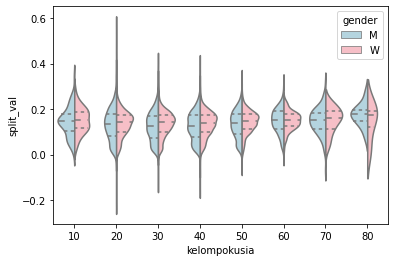

In [ ]:
#bandingkan berdasarkan kelompok data
sns.violinplot("kelompokusia", "split_val", hue="gender", data=data, split=True, inner="quartile", palette=["lightblue", "lightpink"]);

In [ ]:
#ada berapa yang usianya di atas 80 tahun
(data.age > 80).sum()

7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


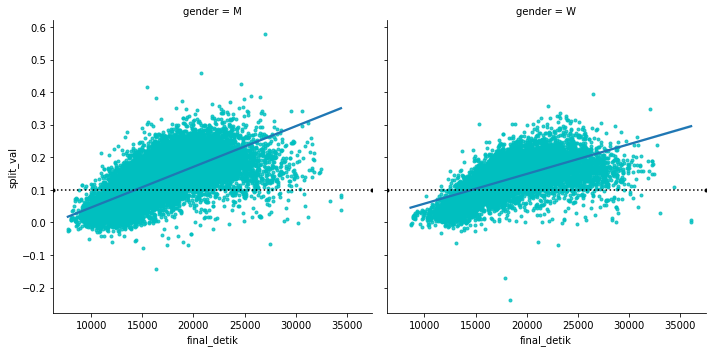

In [ ]:
#adakah korelasi antara split rendah dengan kecepatan selesai
g = sns.lmplot('final_detik', 'split_val', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");